<a href="https://colab.research.google.com/github/Joboreh97/demo-repo/blob/main/Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

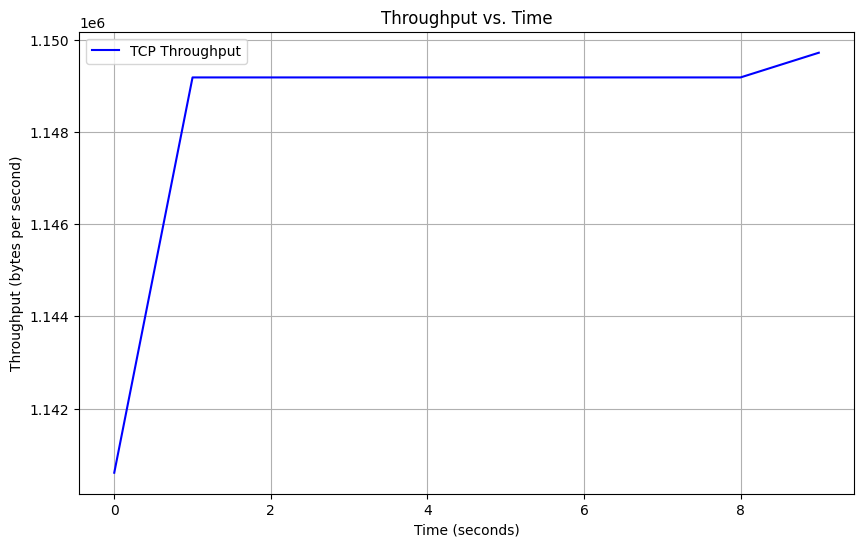

In [2]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your JSON data from a file (replace 'yourfile.json' with your actual filename)
with open('/content/sim_10s.json', 'r') as file:
    data = json.load(file)

# Extract the vector data for the relevant event
vector_data = data.get("General-0-20250603-15:17:27-40568", {}).get("vectors", [])

# Define the packet size
packet_size = 50  # in bytes (not used for TCP throughput calculation here, kept for consistency)

# Initialize a dictionary to hold the total bytes received per second
bytes_per_second = defaultdict(int)

# Extract the vector data and sum bytes per second
for vector in vector_data:
    if vector.get("name") == "packetReceived:vector(packetBytes)":
        time_values = vector.get("time", [])
        packet_sizes = vector.get("value", [])  # actual packet sizes in bytes

        # Sum the bytes received in each second
        for t, size in zip(time_values, packet_sizes):
            second = int(t)  # Get the second part of the timestamp
            bytes_per_second[second] += size

# Prepare time and throughput data
time_values = sorted(bytes_per_second.keys())  # Sorted list of seconds
throughput_values = [bytes_per_second[sec] for sec in time_values]  # Throughput in bytes per second

# Plot the throughput vs. time
plt.figure(figsize=(10, 6))
plt.plot(time_values, throughput_values, label='TCP Throughput', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Throughput (bytes per second)')
plt.title('Throughput vs. Time')
plt.grid(True)
plt.legend()
plt.show()


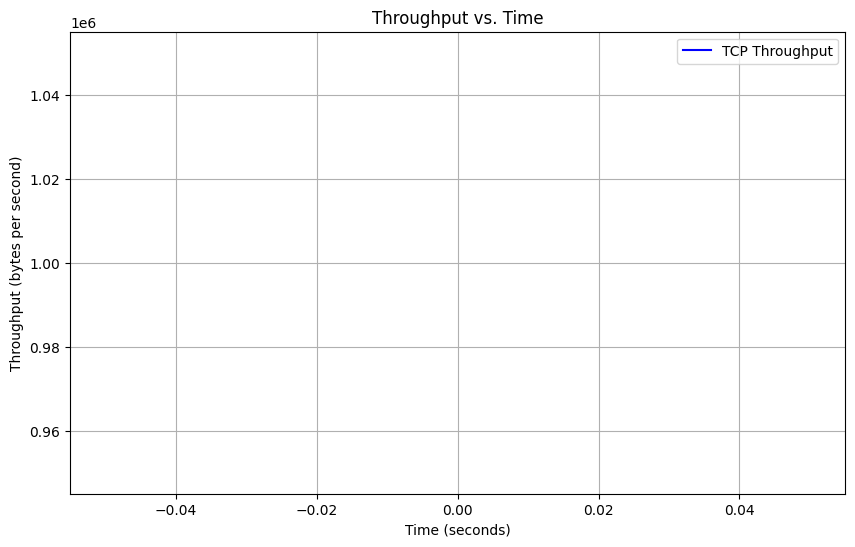

In [5]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your JSON data from a file (replace 'yourfile.json' with your actual filename)
with open('/content/10s_sim.json', 'r') as file:
    data = json.load(file)

# Extract the vector data for the relevant event
vector_data = data.get("General-0-20250603-16:52:42-41680", {}).get("vectors", [])

# Define the packet size
packet_size = 50  # in bytes (not used for TCP throughput calculation here, kept for consistency)

# Initialize a dictionary to hold the total bytes received per second
bytes_per_second = defaultdict(int)

# Extract the vector data and sum bytes per second
for vector in vector_data:
    if vector.get("name") == "packetReceived:vector(packetBytes)":
        time_values = vector.get("time", [])
        packet_sizes = vector.get("value", [])  # actual packet sizes in bytes

        # Sum the bytes received in each second
        for t, size in zip(time_values, packet_sizes):
            second = int(t)  # Get the second part of the timestamp
            bytes_per_second[second] += size

# Prepare time and throughput data
time_values = sorted(bytes_per_second.keys())  # Sorted list of seconds
throughput_values = [bytes_per_second[sec] for sec in time_values]  # Throughput in bytes per second

# Plot the throughput vs. time
plt.figure(figsize=(10, 6))
plt.plot(time_values, throughput_values, label='TCP Throughput', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Throughput (bytes per second)')
plt.title('Throughput vs. Time')
plt.grid(True)
plt.legend()
plt.show()


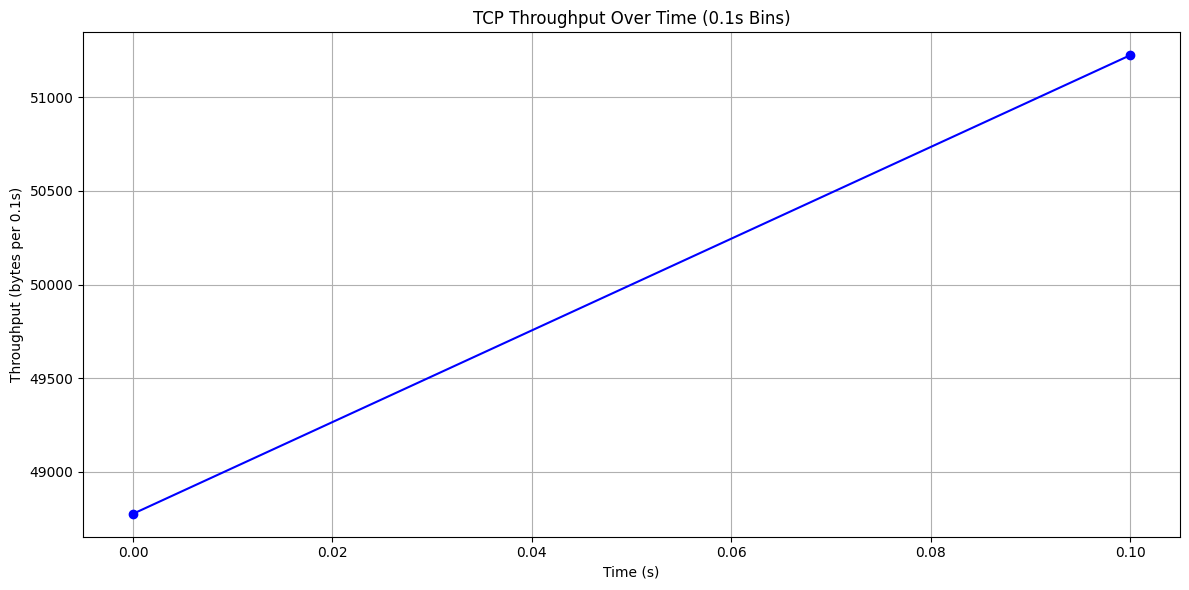

In [6]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the JSON file
with open("/content/10ssim.json", "r") as file:
    data = json.load(file)

# Extract the vector data
key = list(data.keys())[0]
vectors = data[key]["vectors"]

# Find the packetReceived vector
for vector in vectors:
    if vector["name"] == "packetReceived:vector(packetBytes)":
        times = vector["time"]
        values = vector["value"]
        break

# Aggregate throughput in 0.1s bins
throughput_bins = defaultdict(int)
for t, v in zip(times, values):
    bin_time = round(t, 1)
    throughput_bins[bin_time] += v

# Prepare data for plotting
time_points = sorted(throughput_bins.keys())
throughput = [throughput_bins[t] for t in time_points]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_points, throughput, marker='o', linestyle='-', color='blue')
plt.title("TCP Throughput Over Time (0.1s Bins)")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bytes per 0.1s)")
plt.grid(True)
plt.tight_layout()
plt.show()


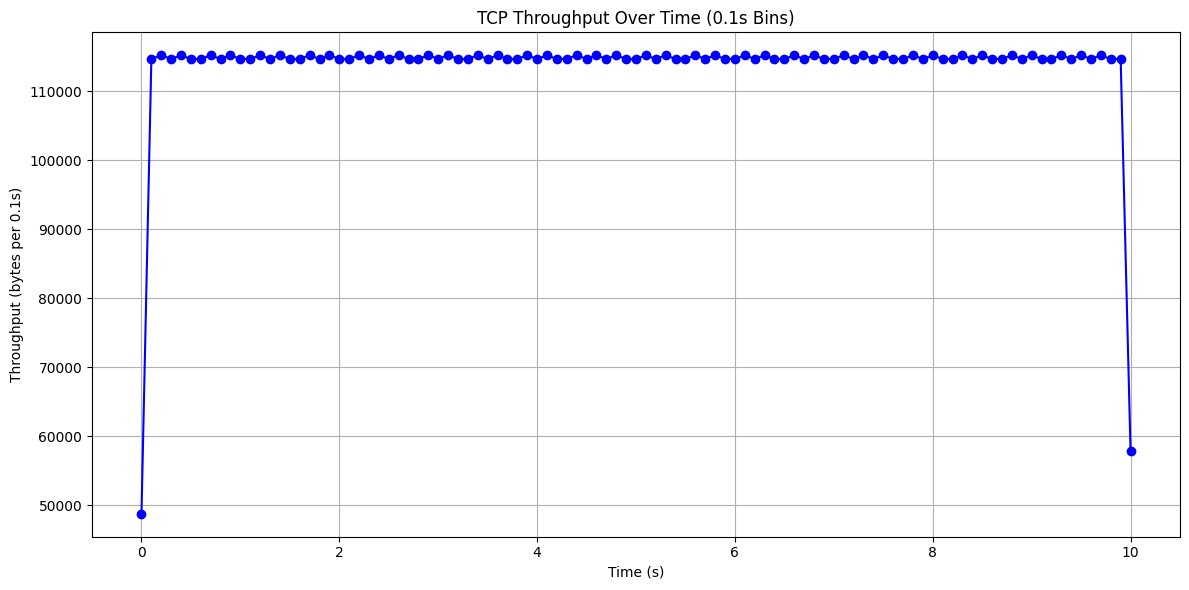

In [8]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the JSON file
with open("/content/sim_10s.json", "r") as file:
    data = json.load(file)

# Extract the vector data
key = list(data.keys())[0]
vectors = data[key]["vectors"]

# Find the packetReceived vector
for vector in vectors:
    if vector["name"] == "packetReceived:vector(packetBytes)":
        times = vector["time"]
        values = vector["value"]
        break

# Aggregate throughput in 0.1s bins
throughput_bins = defaultdict(int)
for t, v in zip(times, values):
    bin_time = round(t, 1)
    throughput_bins[bin_time] += v

# Prepare data for plotting
time_points = sorted(throughput_bins.keys())
throughput = [throughput_bins[t] for t in time_points]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_points, throughput, marker='o', linestyle='-', color='blue')
plt.title("TCP Throughput Over Time (0.1s Bins)")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bytes per 0.1s)")
plt.grid(True)
plt.tight_layout()
plt.show()


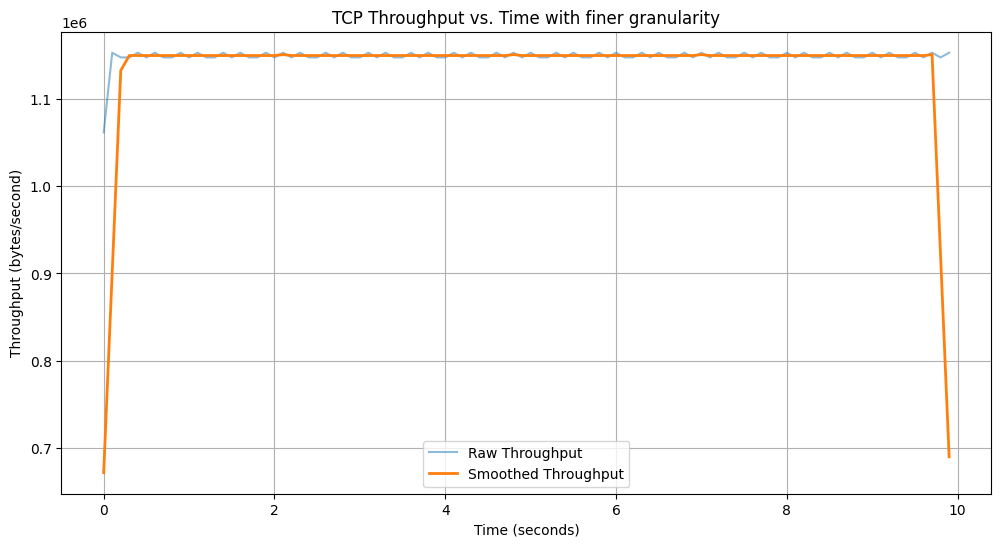

In [7]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Load your JSON data from a file (replace with your actual filename)
with open('/content/sim_10s.json', 'r') as file:
    data = json.load(file)

# Extract the vector data for the relevant event
vector_data = data.get("General-0-20250603-15:17:27-40568", {}).get("vectors", [])

# Define the packet size (kept for consistency; actual sizes used below)
packet_size = 50  # bytes

# Use smaller time bins (e.g., 0.1 seconds)
time_bin_size = 0.1  # seconds

# Dictionary to hold total bytes received per time bin
bytes_per_bin = defaultdict(int)

# Extract vector data and sum bytes per small time bin
for vector in vector_data:
    if vector.get("name") == "packetReceived:vector(packetBytes)":
        time_values = vector.get("time", [])
        packet_sizes = vector.get("value", [])

        for t, size in zip(time_values, packet_sizes):
            bin_index = int(t / time_bin_size)
            bytes_per_bin[bin_index] += size

# Prepare data for plotting
sorted_bins = sorted(bytes_per_bin.keys())
times = [bin_idx * time_bin_size for bin_idx in sorted_bins]
throughput = [bytes_per_bin[bin_idx] / time_bin_size for bin_idx in sorted_bins]  # bytes per second

# Optional: smooth throughput with moving average
window_size = 5  # number of bins
throughput_smoothed = np.convolve(throughput, np.ones(window_size)/window_size, mode='same')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(times, throughput, label='Raw Throughput', alpha=0.5)
plt.plot(times, throughput_smoothed, label='Smoothed Throughput', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Throughput (bytes/second)')
plt.title('TCP Throughput vs. Time with finer granularity')
plt.grid(True)
plt.legend()
plt.show()


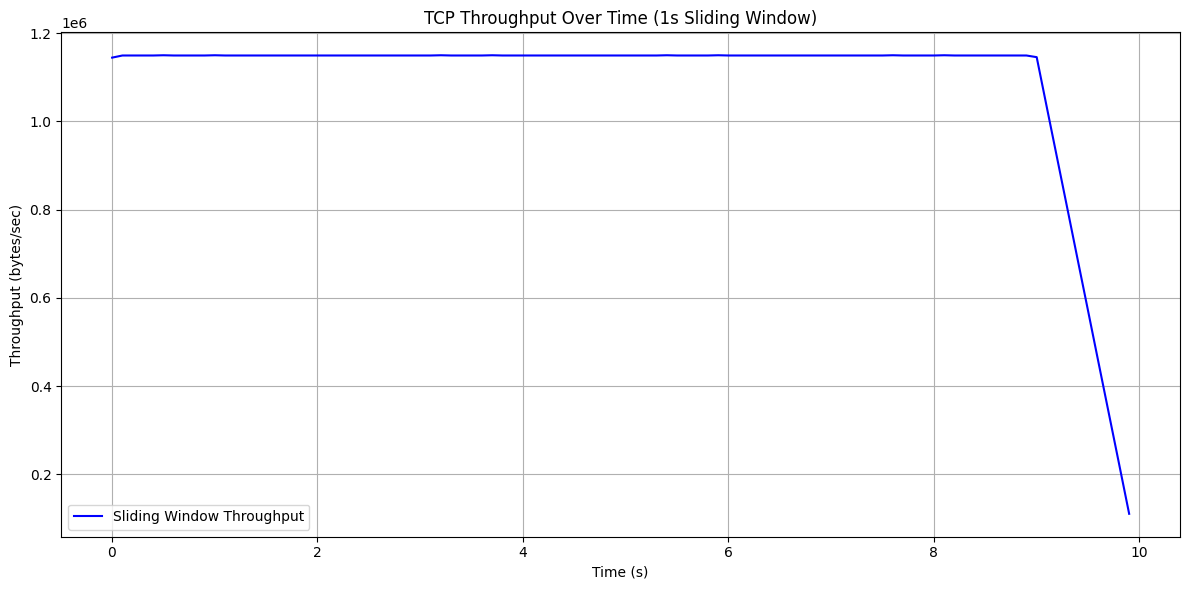

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file
with open("sim_10s.json", "r") as file:
    data = json.load(file)

# Extract the vector data
key = list(data.keys())[0]
vectors = data[key]["vectors"]

# Find the packetReceived vector
for vector in vectors:
    if vector["name"] == "packetReceived:vector(packetBytes)":
        times = np.array(vector["time"])
        sizes = np.array(vector["value"])
        break

# Define sliding window parameters
window_size = 1.0  # seconds
step_size = 0.1    # seconds

# Compute throughput using sliding window
start_time = times[0]
end_time = times[-1]
window_starts = np.arange(start_time, end_time, step_size)
throughput = []

for start in window_starts:
    end = start + window_size
    in_window = (times >= start) & (times < end)
    bytes_in_window = sizes[in_window].sum()
    throughput.append(bytes_in_window / window_size)  # bytes per second

# Plot
plt.figure(figsize=(12, 6))
plt.plot(window_starts, throughput, label="Sliding Window Throughput", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bytes/sec)")
plt.title("TCP Throughput Over Time (1s Sliding Window)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
